# MSDS 631 - Lecture 11 (April 10, 2019)

## End-to-End Analysis

Now that we're comfortable with the basic functionality of Python and Pandas, I want to go through an example of what you can do with all of the tools we've discussed (plus a few extra that we haven't covered yet).

We have three data files that we're mostly going to read from:
- Users: Describes users overall characteristics
- Reviews: Details about individual reviews
- Businesses: Details about the businesses our reviewers rated

The reviews in these files are primarily focused on reviews in Las Vegas, Toronto, and Phoenix

In [1]:
import os
import re
import json
import pandas as pd
import numpy as np
from datetime import datetime as dt

#### These are my file path fetchers

In [2]:
#Code to help me get all of the files in a folder so that I can open them
def get_file_paths(folder, full_path=True):
    file_paths = []
    for (dirpath, dirnames, filenames) in os.walk(folder):
        for file_ in filenames:
            if (not re.match('\.', file_)) and (file_ != '_SUCCESS'):
                if full_path:
                    file_paths.append(os.path.join(dirpath, file_))
                else:
                    file_paths.append((dirpath, file_))
    return file_paths


def get_all_paths(subfolder):
    folder = os.path.join('/Users/jasonshu/Documents/yelp', subfolder)
    files = get_file_paths(folder)
    return files

In [3]:
file_paths = {}
file_paths['reviews'] = get_all_paths('reviews')
file_paths['users'] = get_all_paths('users')
file_paths['businesses'] = ['/Users/jasonshu/Documents/yelp/yelp_businesses.json']

In [4]:
for key in file_paths:
    print(key, len(file_paths[key]))

reviews 67
users 17
businesses 1


#### These are my file openers

In [5]:
def open_single_review_file(filepath):
    data = []
    with open(filepath,  'r') as f:
        reviews = f.read().strip().split('\n')
    for review in reviews:
        temp = json.loads(review)
        del(temp['text'])
        data.append(temp)
    return data


def open_single_user_file(filepath):
    data = []
    elite = []
    with open(filepath,  'r') as f:
        users = f.read().strip().split('\n')
    for user in users:
        temp = json.loads(user)
        data.append(temp)
    return data


def open_business_data(filepath):
    data = []
    with open(filepath,  'r') as f:
        businesses = f.read().strip().split('\n')
    for business in businesses:
        temp = json.loads(business)
        data.append(temp)
    return data

In [6]:
preview = {}
preview['reviews'] = open_single_review_file(file_paths['reviews'][0])
preview['users'] = open_single_user_file(file_paths['users'][0])
preview['businesses'] = open_business_data(file_paths['businesses'][0])

The first thing you ALWAYS do when opening data for the first time is to look at the data type that you have loaded. JSON parsers can return lists or dictionaries, and this will be what allows you to know what you are dealing with and how to access the data.

Once we've done that, we look at a few values to figure out what we have that could be of use for an analysis. I'm doing that for each of our data sources.

##### Reviews

In [7]:
type(preview['reviews'])

list

In [8]:
len(preview['reviews'])

100000

In [9]:
preview['reviews'][0]

{'review_id': 'o38jQ6b9xuPddfKQci2New',
 'user_id': '7oB7Lm30WRxQ_a4yxrD2uQ',
 'business_id': 'SwAZBCyFtVo_8vkRbJhdkA',
 'stars': 3.0,
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'date': '2015-07-09 03:58:00'}

##### Users

In [10]:
type(preview['users'])

list

In [11]:
len(preview['users'])

100000

In [12]:
preview['users'][0]

{'user_id': 'LqYdURcPrWcahAaTvdHUTA',
 'name': 'Cat',
 'review_count': 5,
 'yelping_since': '2010-08-27 23:27:20',
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'elite': '',
 'friends': 'ubL-ihNJWZzqJKFOk8HfRA, fpj-d1sd7v7jO_qVPG1kag, BtMw0613XDT-zjp98Fim-Q, h4uQyT3dGoKbelijli09DA, SSf_vWG_mbUNWxL3b5x01g, rFgd4EP8zGldxule9N9MiA, rnoVR0YO0a-vmWDix9ocNg, t-pbnJGS7RD8aX478c3wMQ, jmKITPvZ_dqvTnPUQpomQQ, YTVLa42YposvYyzXxFq_Ng, 3vGi_VDP2stb6mjeAmHebg, vFO3QYXR7q5g-KbUYJiXlQ, 0XzpYJUDZkSVokwIXbYJKw, 6bd4kn67Do_pdd0cDLYnLw, iBUynw0K2GYNWzT9292hXA, YsJ2dXobbTi2jAOhERgJaA, dexb-3i-xbtC5Wt1agehOQ, -RjJfXz8_qrk1Hyqd-gyaA, 2PkqvOKmS8-e2yY8AwZbzQ, yhuFZ3SPyBEOA_W-l3II4A, u4xyH-IaBeRS5df90p_SmQ, FGbVcQzyD22fDfAm61c1mw, i2BkvX2SX4-Bsdz7kDXAqQ, 4Tuygtn6ZwXVgN4q4O02Jw, 5ePCaZ4oVhTB8zWjTx1wbA, bt_e1DkwSi1q0t2mUR_J9Q, KxpWWbOyr82SchvAV4-IZA, rhIB06K0Q62npyCQh-F1OQ, 2sopTvey8KEXhf1dir-_Zg, bAGTxE3K_xOhOM5W4AG3eg, cp5Zv_4x_QBVm7MYILwLQw, nALWplHXAepSBa8BYlwT-g, 4dNHGbVXY5O_rJplL9Y6Vw, mwdpS9IEj5W49d3BurvU7w, Y8d

##### Businesses

In [13]:
type(preview['businesses'])

list

In [14]:
len(preview['businesses'])

192609

In [15]:
preview['businesses'][0]

{'business_id': '1SWheh84yJXfytovILXOAQ',
 'name': 'Arizona Biltmore Golf Club',
 'address': '2818 E Camino Acequia Drive',
 'city': 'Phoenix',
 'state': 'AZ',
 'postal_code': '85016',
 'latitude': 33.5221425,
 'longitude': -112.0184807,
 'stars': 3.0,
 'review_count': 5,
 'is_open': 0,
 'attributes': {'GoodForKids': 'False'},
 'categories': 'Golf, Active Life',
 'hours': None}

##### Estimated number of observations per type

In [16]:
for key in file_paths:
    num_files = len(file_paths[key])
    obs_per_file = len(preview[key])
    print(key, num_files * obs_per_file)

reviews 6700000
users 1700000
businesses 192609


Now that I know what the data looks like, I'm going to write some functions to get exactly the data I want out of each dictionary from each data source. I don't want to carry around all of the data because it's overwhelming and unnecessary. This is where you need a specific problem in mind to solve so that you can guess ahead of time what you think will be necessary and what you think will never be used.

Sometimes you will want to loop through each item and get only the data you need, then create your DataFrames. Other times (when you are lucky) you can create the DataFrame directly from the data, then get rid of what you don't want. In this case, I have to parse the user data, but I can load the review data directly from the list of dictionaries I have opened. The business data is a little wonky because there is a dictionary as one of the values, which won't really work. However, since the data is not going to be kept, I will load it directly as a DataFrame and then drop it.

NOTE: Loading data as a DataFrame and dropping unwanted fields is much faster than using for-loops and parsing along the way. However, it is much more resource intensive for your computer to hold all of the data in a DataFrame, so your computer may not actually be able to do it every time. This is a trial and error thing until you do it enough times to know what you can and cannot load.

#### These are my file parsers for users and businesses

For users, I want some raw data, but I also want to "create" new data from the data I am seeing. For instance, I don't care about who the individual user's friends are - that's not helpful in this context. I do, however, think it could be useful to know *how many* friends they have. I also want to know the years they were "Elite" because I think that may be interesting down the road. Since that data comes to us in a different form and does not align 1-to-1, there is no easy way to store that data as an attribute of the user. Thus, I have to create an entirely different way of storing the users' elite years.

In [17]:
def parse_single_user_dict(user):
    base_fields = ['user_id', 'name', 'review_count', 'average_stars', 'yelping_since', 'fans', 'cool', 'funny', 'useful']
    base_data = [user[field] for field in base_fields]
    num_friends = len(user['friends'].split(', '))
    base_data.append(num_friends)
    if user['elite']:
        years_elite = user['elite'].split(',')
        user_id = user['user_id']
        elite_list = []
        for year in years_elite:
            elite_list.append([user_id, year])
    else:
        elite_list = []
    return base_data, elite_list

def parse_single_business_dict(business):
    base_fields = ['business_id', 'name', 'review_count', 'stars', 'city', 'state', 'postal_code']
    base_data = [business[field] for field in base_fields]
    return base_data

In [18]:
parse_single_user_dict(preview['users'][0])

(['LqYdURcPrWcahAaTvdHUTA',
  'Cat',
  5,
  3.0,
  '2010-08-27 23:27:20',
  1,
  0,
  0,
  0,
  111],
 [])

Now that I have my parser and file loading strategy, I will write a function that allows me to convert each of the files I open into a DataFrame. This is ultimately where we want 90% of our analyses to wind up (in a DataFrame). I will combine the knowledge I have of the structure of the file with the user parser I just wrote to do this.

##### File openers

In [19]:
def load_reviews_from_file_as_df(reviews_list_of_dicts):
    kept_columns = ['review_id', 'user_id', 'business_id', 'stars', 'date']
    reviews_df = pd.DataFrame(reviews_list_of_dicts)
    subset_df = reviews_df[kept_columns].copy()
    return subset_df

In [20]:
def load_users_from_file_as_df(users_list_of_dicts):
    user_data = []
    elite_data = []
    for user_dict in users_list_of_dicts:
        user, elite = parse_single_user_dict(user_dict)
        user_data.append(user)
        elite_data += elite
    user_df = pd.DataFrame(user_data)
    elite_df = pd.DataFrame(elite_data)
    user_df.columns = ['user_id', 'name', 'review_count', 'average_stars', 'yelping_since', 'fans', 'cool', 
                       'funny', 'useful', 'num_friends']
    elite_df.columns = ['user_id', 'year']
    return user_df, elite_df

In [21]:
def load_businesses_from_file_as_df(businesses_list_of_dicts):
    kept_columns = ['business_id', 'name', 'review_count', 'stars', 'city', 'state', 'postal_code']
    businesses_df = pd.DataFrame(businesses_list_of_dicts)
    subset_df = businesses_df[kept_columns].copy()
    return subset_df

ALMOST THERE!

Now that we can open a single file, for the data types that are being read from multiple files, I need to open each file, load it as a DataFrame, put each DataFrame into a list, then concatenate them into a single DataFrame.

For businesses, even though I don't need to create another function, I am so that the naming convention is consistent and I can keep track of things better.

In [22]:
def load_all_reviews(list_of_filepaths):
    all_reviews = []
    num_files = len(list_of_filepaths)
    print('Loading reviews')
    for n,f in enumerate(list_of_filepaths):
        print(f'\t{n} of {num_files}')
        reviews_list_of_dicts = open_single_review_file(f)
        reviews_df = load_reviews_from_file_as_df(reviews_list_of_dicts)
        all_reviews.append(reviews_df)
    all_reviews_df = pd.concat(all_reviews)
    return all_reviews_df

In [23]:
def load_all_users(list_of_filepaths):
    all_users = []
    all_elite = []
    num_files = len(list_of_filepaths)
    print('Loading users')
    for n, f in enumerate(list_of_filepaths):
        print(f'\t{n} of {num_files}')
        users_list_of_dicts = open_single_user_file(f)
        users_df, elite_df = load_users_from_file_as_df(users_list_of_dicts)
        all_users.append(users_df)
        all_elite.append(elite_df)
    all_users_df = pd.concat(all_users)
    all_elite_df = pd.concat(all_elite)
    return all_users_df, all_elite_df

In [24]:
def load_all_businesses(filepath):
    print('Loading businesses')
    businesses_list_of_dicts = open_business_data(filepath)
    all_businesses_df = load_businesses_from_file_as_df(businesses_list_of_dicts)
    return all_businesses_df

In [25]:
# t1 = dt.now()
reviews = load_all_reviews(file_paths['reviews'])
t2 = dt.now()
# print('\t', t2-t1)
users, elite = load_all_users(file_paths['users'])
t3 = dt.now()
print('\t', t3-t2)
businesses = load_all_businesses(file_paths['businesses'][0])
t4 = dt.now()
print('\t', t4-t3)

Loading reviews
	0 of 67
	1 of 67
	2 of 67
	3 of 67
	4 of 67
	5 of 67
	6 of 67
	7 of 67
	8 of 67
	9 of 67
	10 of 67
	11 of 67
	12 of 67
	13 of 67
	14 of 67
	15 of 67
	16 of 67
	17 of 67
	18 of 67
	19 of 67
	20 of 67
	21 of 67
	22 of 67
	23 of 67
	24 of 67
	25 of 67
	26 of 67
	27 of 67
	28 of 67
	29 of 67
	30 of 67
	31 of 67
	32 of 67
	33 of 67
	34 of 67
	35 of 67
	36 of 67
	37 of 67
	38 of 67
	39 of 67
	40 of 67
	41 of 67
	42 of 67
	43 of 67
	44 of 67
	45 of 67
	46 of 67
	47 of 67
	48 of 67
	49 of 67
	50 of 67
	51 of 67
	52 of 67
	53 of 67
	54 of 67
	55 of 67
	56 of 67
	57 of 67
	58 of 67
	59 of 67
	60 of 67
	61 of 67
	62 of 67
	63 of 67
	64 of 67
	65 of 67
	66 of 67
Loading users
	0 of 17
	1 of 17
	2 of 17
	3 of 17
	4 of 17
	5 of 17
	6 of 17
	7 of 17
	8 of 17
	9 of 17
	10 of 17
	11 of 17
	12 of 17
	13 of 17
	14 of 17
	15 of 17
	16 of 17
	 0:01:13.523282
Loading businesses
	 0:00:05.509072


In [26]:
reviews.shape

(6685900, 5)

In [27]:
users.shape

(1637138, 10)

In [28]:
businesses.shape

(192609, 7)

#### Success!!!

Loading and cleaning data is the worst part of every analysis. It took me 6 hours just to write the code to just **open** the files, let alone parse it, and transform it into DataFrames. Don't think for a second that any of this comes easy and that you are doing something wrong if you are spinning your wheels trying to get the data to be analyzed. Some figures estimate that 80% of a data scientist's time is spent just loading and cleaning data. The analysis is the **easy** part! This is why we spent so much of our class looking at how to do things in Python. Now that we have the data loaded, it's time to have fun!!

## Analyses

In this section, I will perform three analyses that answer different questions about Yelp users and businesses, including:
1. Can I make up of "personas" for Yelp reviewers and find them?
2. Do "Elite" reviewers tend to take their responsibility more seriously and judge businesses more critically?

### Analysis 1a - Finding personas of yelp users

Yelp data is one of my favorite data sets because there are so many things you can glean about people. One of the things that intrigues me the most is regarding the different types of "personalities" that exist amongst reviewers. A few include:
- Hot-Cold Harry: Tends to either love a place or hate it (mostly 5-star and 1-star reviews
- Normal Norman: Tends to fit the distribution of reviews in a bell-shaped curve
- Negative Nancy: Tends to be mostly a complainer with more 1- and 2-star reviews
- Positive Patricia: Tends to give mostly 4- and 5-star reviews. She is either easily satisfied or only goes places that she knows she will like (reinforcement bias)
- Content Cassandra: Tends to give mostly positive reviews, centered mostly around 4-star with some 5-star and some 3-star as well

So that you might know what these distributions look like, let's just set those up here.

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [30]:
distributions = {}
distributions['Hot-Cold Harry'] = pd.Series([.3, .1, .05, .15, .4])
distributions['Normal Norman'] = pd.Series([.05, .15, .4, .25, .15])
distributions['Negative Nancy'] = pd.Series([.3, .4, .1, .1, .1])
distributions['Positive Patricia'] = pd.Series([.05, .05, .15, .25, .5])
distributions['Content Cassandra'] = pd.Series([0, 0, .2, .5, .3])
distributions['Even Evan'] = pd.Series([.2, .2, .2, .2, .2])

Hot-Cold Harry


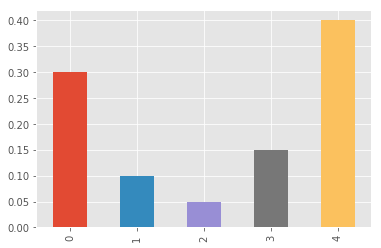

Normal Norman


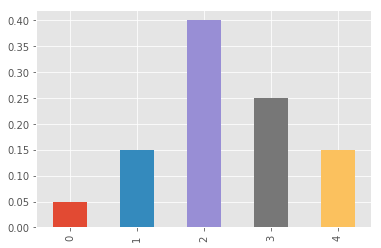

Negative Nancy


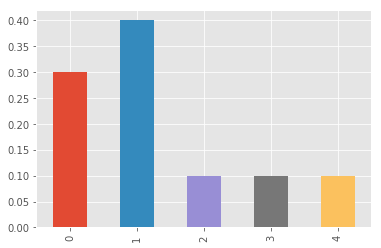

Positive Patricia


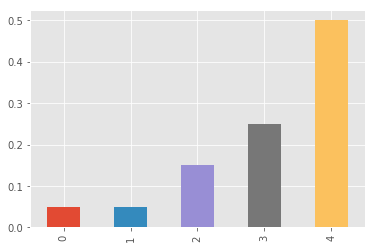

Content Cassandra


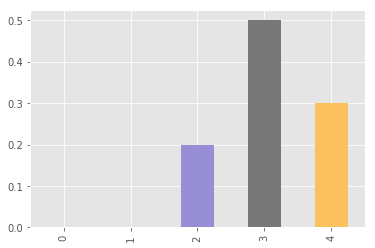

Even Evan


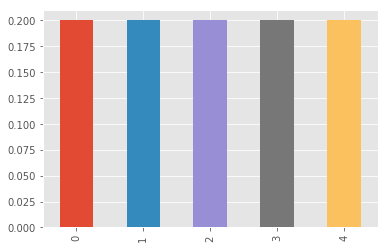

In [31]:
for name in distributions:
    distributions[name].plot(kind='bar')
    print(name)
    plt.show()

Now let's use some techniques used for measuring "closeness" or "similarity" to assign a reviewer a persona.

In order to get each reviewers score distribution, we need to aggregate their review data. Let's refresh our memories about what the review DataFrame looks like.

In [32]:
reviews.head()

,review_id,user_id,business_id,stars,date
0,o38jQ6b9xuPddfKQci2New,7oB7Lm30WRxQ_a4yxrD2uQ,SwAZBCyFtVo_8vkRbJhdkA,3.0,2015-07-09 03:58:00
1,EbWbt8TASSn17NgL9o67uw,pyKHu2SZQBWKRHix3hXyZw,VyVIneSU7XAWgMBllI6LnQ,5.0,2009-08-24 03:49:22
2,vftEu5Ek-dptcnZML7EfHw,Et79VAN692zD2j32PM1E8w,F7brgUpbZJgPgoeUrM2-mQ,5.0,2014-04-04 21:34:26
3,JSCTbOgxO9eU7KmHnvtfpw,SPI7O1GKZTvJhiXNFj81Eg,0ldxjei8v4q95fApIei3Lg,5.0,2017-09-01 05:42:03
4,WhtWNM-FOmtaser3VyAGBg,_zeDKS8zMEEvvpnW7MGQLg,v_yCY6NCwxCPIsNZR80UfQ,1.0,2016-04-15 18:04:18


I'm going to convert the star ratings to integers to make things a little easier for me. Then I'm going to group by the user IDs and star ratings to get the users' review count by rating.

In [33]:
reviews['stars'] = reviews['stars'].astype(int)
reviewer_stars = reviews.groupby(['user_id', 'stars'])[['review_id']].count()
reviewer_stars = reviewer_stars.reset_index()
reviewer_stars.columns = ['user_id', 'stars', 'review_count']
reviewer_stars.head(10)

,user_id,stars,review_count
0,---1lKK3aKOuomHnwAkAow,1,17
1,---1lKK3aKOuomHnwAkAow,2,5
2,---1lKK3aKOuomHnwAkAow,3,10
3,---1lKK3aKOuomHnwAkAow,4,23
4,---1lKK3aKOuomHnwAkAow,5,73
5,---89pEy_h9PvHwcHNbpyg,5,1
6,---94vtJ_5o_nikEs6hUjg,5,4
7,---PLwSf5gKdIoVnyRHgBA,3,1
8,---PLwSf5gKdIoVnyRHgBA,5,1
9,---cu1hq55BP9DWVXXKHZg,1,2


Now we want the data so that it's more easily digestable. We're going to use the handy dandy pivot table to do this.

In [34]:
reviewer_stars_table = reviewer_stars.pivot_table(index='user_id', columns='stars', values='review_count')
reviewer_stars_table.head(10)

stars,1,2,3,4,5
user_id,,,,,
---1lKK3aKOuomHnwAkAow,17.0,5.0,10.0,23.0,73.0
---89pEy_h9PvHwcHNbpyg,NaN,NaN,NaN,NaN,1.0
---94vtJ_5o_nikEs6hUjg,NaN,NaN,NaN,NaN,4.0
---PLwSf5gKdIoVnyRHgBA,NaN,NaN,1.0,NaN,1.0
---cu1hq55BP9DWVXXKHZg,2.0,NaN,NaN,1.0,NaN
---fhiwiwBYrvqhpXgcWDQ,1.0,NaN,NaN,NaN,NaN
---udAKDsn0yQXmzbWQNSw,NaN,NaN,NaN,1.0,1.0
--0LlX_UcypHnxW-4BUAdA,NaN,NaN,NaN,NaN,1.0
--0RtXvcOIE4XbErYca6Rw,NaN,NaN,NaN,1.0,NaN


We can see that several of our users only have a few reviews. Let's only focus on ones that have at least 10 reviews (this is an arbitrary cutoff).

In [35]:
reviewer_stars_table['total_reviews'] = reviewer_stars_table.sum(axis=1)

In [36]:
reviewer_stars_table.shape

(1637138, 6)

In [37]:
reviewer_stars_table_10 = reviewer_stars_table[reviewer_stars_table['total_reviews'] >= 10]
reviewer_stars_table_10.head(10)

stars,1,2,3,4,5,total_reviews
user_id,,,,,,
---1lKK3aKOuomHnwAkAow,17.0,5.0,10.0,23.0,73.0,128.0
--0kuuLmuYBe3Rmu0Iycww,2.0,2.0,NaN,6.0,2.0,12.0
--2HUmLkcNHZp0xw6AMBPg,2.0,2.0,4.0,5.0,52.0,65.0
--2vR0DIsmQ6WfcSzKWigw,NaN,1.0,9.0,11.0,14.0,35.0
--3WaS23LcIXtxyFULJHTA,NaN,1.0,4.0,5.0,5.0,15.0
--4rAAfZnEIAKJE80aIiYg,17.0,5.0,3.0,2.0,8.0,35.0
--BumyUHiO_7YsHurb9Hkw,1.0,5.0,10.0,31.0,15.0,62.0
--CIuK7sUpaNzalLAlHJKA,4.0,6.0,8.0,14.0,2.0,34.0
--DxiDMQgN08E5gTM0aj7Q,4.0,1.0,1.0,1.0,5.0,12.0


Out of curiousity, how many reviewers did we have, and how many do we have left after filtering?

In [38]:
print(reviewer_stars_table.shape[0])
print(reviewer_stars_table_10.shape[0])
print(reviewer_stars_table_10.shape[0]/reviewer_stars_table.shape[0])

1637138
122824
0.07502360827248528


We lost 92.5% of our reviewers!!! Let's see what percentage of reviews were actually written by those who met our threshold.

In [39]:
count_analysis = reviewer_stars_table.copy()
count_analysis = count_analysis.sort_values('total_reviews', ascending=False)
total_reviews = count_analysis['total_reviews'].sum()
count_analysis['cum_reviews'] = count_analysis['total_reviews'].cumsum()
count_analysis['cum_pct'] = count_analysis['cum_reviews'] / total_reviews
count_analysis.head(10)

stars,1,2,3,4,5,total_reviews,cum_reviews,cum_pct
user_id,,,,,,,,
CxDOIDnH8gp9KXzpBHJYXw,61.0,449.0,2164.0,1373.0,82.0,4129.0,4129.0,0.000618
bLbSNkLggFnqwNNzzq-Ijw,42.0,254.0,1072.0,938.0,48.0,2354.0,6483.0,0.000970
PKEzKWv_FktMm2mGPjwd0Q,12.0,78.0,672.0,787.0,273.0,1822.0,8305.0,0.001242
ELcQDlf69kb-ihJfxZyL0A,247.0,251.0,525.0,554.0,187.0,1764.0,10069.0,0.001506
DK57YibC5ShBmqQl97CKog,17.0,62.0,413.0,960.0,275.0,1727.0,11796.0,0.001764
U4INQZOPSUaj8hMjLlZ3KA,30.0,150.0,304.0,546.0,529.0,1559.0,13355.0,0.001997
QJI9OSEn6ujRCtrX06vs1w,20.0,119.0,451.0,706.0,200.0,1496.0,14851.0,0.002221
d_TBs6J3twMy9GChqUEXkg,15.0,141.0,474.0,612.0,118.0,1360.0,16211.0,0.002425
hWDybu_KvYLSdEFzGrniTw,24.0,118.0,360.0,644.0,209.0,1355.0,17566.0,0.002627


In [40]:
count_analysis[count_analysis['total_reviews'] >= 10].tail()

stars,1,2,3,4,5,total_reviews,cum_reviews,cum_pct
user_id,,,,,,,,
5l4cUy_IOQ9xMhCk9QhilA,1.0,NaN,1.0,2.0,6.0,10.0,3486252.0,0.521433
1ijlbPqqDO-XkQzzQhainA,1.0,3.0,1.0,NaN,5.0,10.0,3486262.0,0.521435
I8r0Vu2ZUFgQOAew8J5YkQ,3.0,NaN,NaN,2.0,5.0,10.0,3486272.0,0.521436
ZF1aaXwY0EoMTHk1VQE4Ag,NaN,NaN,NaN,NaN,10.0,10.0,3486282.0,0.521438
Dhu6aImDeEh_riqpDOIkdw,4.0,2.0,NaN,NaN,4.0,10.0,3486292.0,0.521439


Based on this, it looks like our 10+ count reviewers make up 52.1% of the total reviews in our data set. I can live with that. ok, now let's look at a few random users' star distributions and see what they look like.

In [41]:
sample = reviewer_stars_table_10.sample(5)
sample

stars,1,2,3,4,5,total_reviews
user_id,,,,,,
zg5YVgLwD7STpfugc1dsXw,NaN,NaN,1.0,NaN,9.0,10.0
gRRDzxER0YrxtHN3kYsUmw,2.0,3.0,1.0,11.0,3.0,20.0
taMG4xxcpl2d7krYHmsPRA,4.0,NaN,NaN,1.0,5.0,10.0
jGIFXPcWdocsG98dniaZdA,2.0,NaN,2.0,5.0,14.0,23.0
dzJcgfX4XmlimjpJuSmLlA,2.0,1.0,2.0,10.0,8.0,23.0


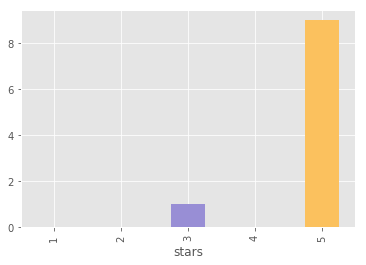

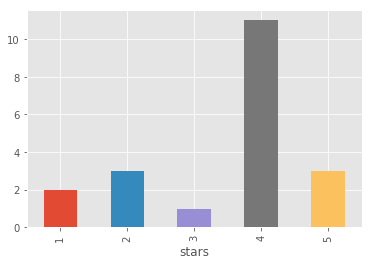

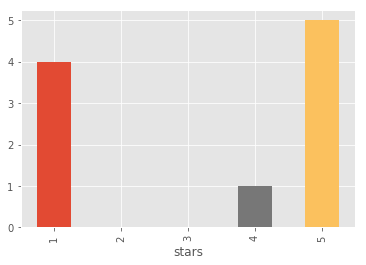

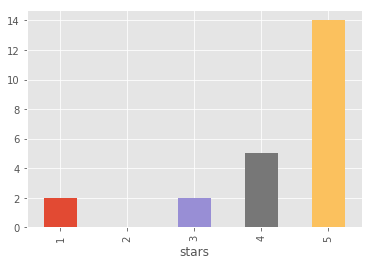

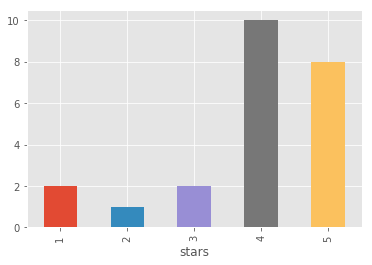

In [42]:
for user in sample.index:
    row = sample.loc[user, [1,2,3,4,5]]
    row.plot(kind='bar')
    plt.show()

Ok, now let's see if we can find a way to automatically find which of the five personas that our users are closest to. We're going to use the idea of "Cosine Similarity."

<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png" width="350" height="350"/>

The formula for this is:
<img src="https://neo4j.com/docs/graph-algorithms/current/images/cosine-similarity.png" width="400" height="400"/>

So, if I had two identical vectors listed below, their similarity should be perfect. Let's see the math work.

In [43]:
a = pd.Series([1, 2, 1, 4, 2])
b = pd.Series([1, 2, 1, 4, 2])

In [44]:
a.dot(b)

26

In [45]:
a_magnitude = np.sqrt((a ** 2).sum())
b_magnitude = np.sqrt((b ** 2).sum())

In [46]:
(a.dot(b)) / (a_magnitude * b_magnitude)

1.0000000000000002

Sweet!

Let's change b a tiny bit and see what happens.

In [47]:
b = pd.Series([1, 2, 1, 3, 2])
b_magnitude = np.sqrt((b ** 2).sum())

In [48]:
(a.dot(b)) / (a_magnitude * b_magnitude)

0.9898267954648645

This shouldn't be interpreted as "99% similar", but if that helps you internalize similarity, then go ahead and think that way.

Let's go ahead and write the function so that we can compute the similarity of any two vectors (assuming they are the same length).

In [49]:
def compute_cosine_similarity(vec1, vec2):
    if isinstance(vec1, list):
        vec1 = pd.Series(vec1)
    if isinstance(vec2, list):
        vec2 = pd.Series(vec2)
    dot = vec1.dot(vec2)
    magnitude1 = np.sqrt((vec1 ** 2).sum())
    magnitude2 = np.sqrt((vec2 ** 2).sum())
    similarity = dot / (magnitude1 * magnitude2)
    return similarity

In [50]:
#Let's test our function
compute_cosine_similarity(a, b)

0.9898267954648645

To help ourselves out, we're going to do a couple of things now:
1. Create a DataFrame of values for our personas
2. Drop the total_reviews column from our table
3. Write a function that computes the similarity of a user to each of our personas

In [51]:
personas_df = pd.DataFrame.from_dict(distributions, orient='index')
personas_df = personas_df.sort_index()
personas_df

,0,1,2,3,4
Content Cassandra,0.00,0.00,0.20,0.50,0.30
Even Evan,0.20,0.20,0.20,0.20,0.20
Hot-Cold Harry,0.30,0.10,0.05,0.15,0.40
Negative Nancy,0.30,0.40,0.10,0.10,0.10
Normal Norman,0.05,0.15,0.40,0.25,0.15
Positive Patricia,0.05,0.05,0.15,0.25,0.50


In [52]:
#Looks like we need to modify the column names
personas_df.columns = [1,2,3,4,5]
personas_df

,1,2,3,4,5
Content Cassandra,0.00,0.00,0.20,0.50,0.30
Even Evan,0.20,0.20,0.20,0.20,0.20
Hot-Cold Harry,0.30,0.10,0.05,0.15,0.40
Negative Nancy,0.30,0.40,0.10,0.10,0.10
Normal Norman,0.05,0.15,0.40,0.25,0.15
Positive Patricia,0.05,0.05,0.15,0.25,0.50


In [53]:
reviewer_stars_table_10 = reviewer_stars_table_10.drop('total_reviews', axis=1)

In [54]:
reviewer_stars_table_10.head()

stars,1,2,3,4,5
user_id,,,,,
---1lKK3aKOuomHnwAkAow,17.0,5.0,10.0,23.0,73.0
--0kuuLmuYBe3Rmu0Iycww,2.0,2.0,NaN,6.0,2.0
--2HUmLkcNHZp0xw6AMBPg,2.0,2.0,4.0,5.0,52.0
--2vR0DIsmQ6WfcSzKWigw,NaN,1.0,9.0,11.0,14.0
--3WaS23LcIXtxyFULJHTA,NaN,1.0,4.0,5.0,5.0


In [55]:
#We need to fill in the null values with 0 so that we can do our math
reviewer_stars_table_10 = reviewer_stars_table_10.fillna(0)

In [56]:
#Let's just see an example of a row
one_reviewer_row = reviewer_stars_table_10.loc['---1lKK3aKOuomHnwAkAow']
one_reviewer_row

stars
1    17.0
2     5.0
3    10.0
4    23.0
5    73.0
Name: ---1lKK3aKOuomHnwAkAow, dtype: float64

In [57]:
one_reviewer_distribution = one_reviewer_row / one_reviewer_row.sum()
one_reviewer_distribution

stars
1    0.132812
2    0.039062
3    0.078125
4    0.179688
5    0.570312
Name: ---1lKK3aKOuomHnwAkAow, dtype: float64

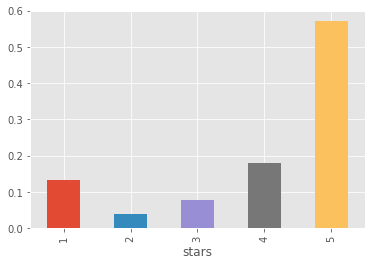

In [58]:
one_reviewer_distribution.plot(kind='bar')

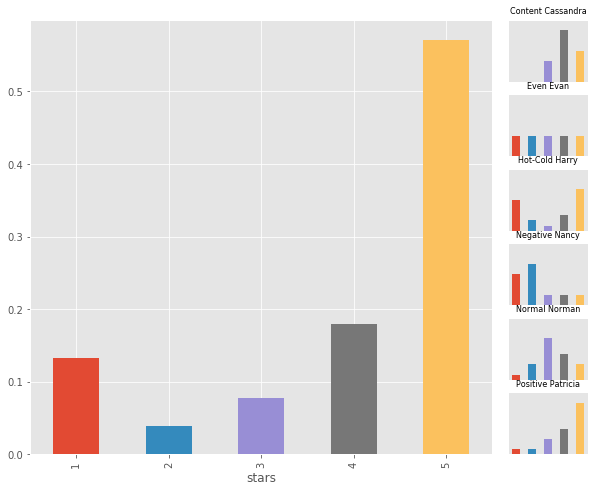

In [59]:
def plot_against_personas(one_reviewer_distribution, distributions):
    axes = []
    fig = plt.figure(figsize=(10,8))  
    order = sorted(list(distributions.keys()))
    for i, persona in enumerate(order):
        axes.append(plt.subplot2grid((6,6),(i,5)))
    axes.append(plt.subplot2grid((6,6),(0,0),rowspan=6,colspan=5))
    for i, persona in enumerate(order):
        distributions[persona].plot(kind='bar', ax=axes[i])
        axes[i].xaxis.set_visible(False)
        axes[i].yaxis.set_visible(False)
        axes[i].set_title(persona, fontdict={'fontsize': 8})
        axes[i].set_ylim((0,.6))
    one_reviewer_distribution.plot(kind='bar', ax=axes[6])
    plt.show()
plot_against_personas(one_reviewer_distribution, distributions)    

In [60]:
def measure_persona_similarity(user_id, user_review_count, personas_df):
    all_scores = [user_id]
    user_relative_pcts = user_review_count / user_review_count.sum()
    order = sorted(distributions.keys())
    for persona in order:
        persona_distribution = personas_df.loc[persona]
        similarity = compute_cosine_similarity(user_review_count, persona_distribution)
        all_scores.append(similarity)
    return all_scores

In [61]:
measure_persona_similarity('---1lKK3aKOuomHnwAkAow', one_reviewer_distribution, personas_df)

['---1lKK3aKOuomHnwAkAow',
 0.7251175874123112,
 0.7228063223242011,
 0.9165290863619725,
 0.4223682126651706,
 0.5419010046038181,
 0.9712252484713871]

In [62]:
reviewer_stars_table_10.head()

stars,1,2,3,4,5
user_id,,,,,
---1lKK3aKOuomHnwAkAow,17.0,5.0,10.0,23.0,73.0
--0kuuLmuYBe3Rmu0Iycww,2.0,2.0,0.0,6.0,2.0
--2HUmLkcNHZp0xw6AMBPg,2.0,2.0,4.0,5.0,52.0
--2vR0DIsmQ6WfcSzKWigw,0.0,1.0,9.0,11.0,14.0
--3WaS23LcIXtxyFULJHTA,0.0,1.0,4.0,5.0,5.0


In [63]:
#You do not need to know/understand this
#This is the same thing as df / df.sum(axis=1), but I used a math trick to compute it faster
def scale_rows(df):
    total = df.sum(axis=1)
    df_T = df.T
    total_T = total.T
    scaled_df_T = df_T / total_T
    scaled_df = scaled_df_T.T
    return scaled_df

In [64]:
reviewer_stars_table_10_scaled = scale_rows(reviewer_stars_table_10)

In [65]:
reviewer_stars_table_10_scaled.head()

stars,1,2,3,4,5
user_id,,,,,
---1lKK3aKOuomHnwAkAow,0.132812,0.039062,0.078125,0.179688,0.570312
--0kuuLmuYBe3Rmu0Iycww,0.166667,0.166667,0.000000,0.500000,0.166667
--2HUmLkcNHZp0xw6AMBPg,0.030769,0.030769,0.061538,0.076923,0.800000
--2vR0DIsmQ6WfcSzKWigw,0.000000,0.028571,0.257143,0.314286,0.400000
--3WaS23LcIXtxyFULJHTA,0.000000,0.066667,0.266667,0.333333,0.333333


In [66]:
#I'm only going to compute the first 10,000 because it will take so long
#Doing it using a for-loop is fine for you... I used some math tricks to get it computed
all_similarities = []
t1 = dt.now()
for i, user_id in enumerate(reviewer_stars_table_10.head(10000).index):
    if i % 1000 == 0:
        print('{:.1%}'.format(i / reviewer_stars_table_10.shape[0]))
    row = reviewer_stars_table_10.loc[user_id]
    similarities = measure_persona_similarity(user_id, row, personas_df)
    all_similarities.append(similarities)
t2 = dt.now()
print(t2-t1)

0.0%
0.8%
1.6%
2.4%
3.3%
4.1%
4.9%
5.7%
6.5%
7.3%
0:00:41.549723


In [68]:
ids = reviewer_stars_table_10_scaled.head(10000).index.tolist()
columns = ['user_id'] + personas_df.index.tolist()
similarities_df = pd.DataFrame(all_similarities, columns=columns, index=ids)
similarities_df.head(10)

,user_id,Content Cassandra,Even Evan,Hot-Cold Harry,Negative Nancy,Normal Norman,Positive Patricia
---1lKK3aKOuomHnwAkAow,---1lKK3aKOuomHnwAkAow,0.725118,0.722806,0.916529,0.422368,0.541901,0.971225
--0kuuLmuYBe3Rmu0Iycww,--0kuuLmuYBe3Rmu0Iycww,0.842927,0.774597,0.675923,0.600099,0.611111,0.668350
--2HUmLkcNHZp0xw6AMBPg,--2HUmLkcNHZp0xw6AMBPg,0.584342,0.554020,0.805047,0.270134,0.405301,0.916833
--2vR0DIsmQ6WfcSzKWigw,--2vR0DIsmQ6WfcSzKWigw,0.933941,0.783604,0.731452,0.359516,0.828572,0.957302
--3WaS23LcIXtxyFULJHTA,--3WaS23LcIXtxyFULJHTA,0.951288,0.819538,0.697975,0.415581,0.881682,0.921883
--4rAAfZnEIAKJE80aIiYg,--4rAAfZnEIAKJE80aIiYg,0.328156,0.791580,0.876256,0.802808,0.437968,0.524720
--BumyUHiO_7YsHurb9Hkw,--BumyUHiO_7YsHurb9Hkw,0.985290,0.765490,0.617986,0.412175,0.786345,0.807269
--CIuK7sUpaNzalLAlHJKA,--CIuK7sUpaNzalLAlHJKA,0.839561,0.855363,0.537408,0.637865,0.876919,0.598148
--DxiDMQgN08E5gTM0aj7Q,--DxiDMQgN08E5gTM0aj7Q,0.538028,0.809040,0.988369,0.655273,0.507726,0.814413
--HCoE1ghaAlcaAfshICgw,--HCoE1ghaAlcaAfshICgw,0.602601,0.542451,0.795227,0.272207,0.379330,0.916590


In [69]:
def compute_similarities_linalg(reviewer_relative_stars_df, personas_df):
    reviewer_matrix = reviewer_relative_stars_df.values.T
    personas_matrix = personas_df.values
    dot = pd.DataFrame(personas_matrix.dot(reviewer_matrix).T)
    user_magnitude = pd.DataFrame(np.sqrt((reviewer_relative_stars_df ** 2).sum(axis=1)))
    persona_magnitude = pd.DataFrame(np.sqrt((personas_df ** 2).sum(axis=1)))
    magnitude_product = user_magnitude.values.dot(persona_magnitude.values.T)
    similarity_scores = dot / magnitude_product
    similarity_scores.columns = personas_df.index.tolist()
    similarity_scores.set_index(reviewer_relative_stars_df.index, inplace=True)
    return similarity_scores

In [70]:
user_persona_scores_df = compute_similarities_linalg(reviewer_stars_table_10_scaled, personas_df)

In [71]:
user_persona_scores_df.head()

,Content Cassandra,Even Evan,Hot-Cold Harry,Negative Nancy,Normal Norman,Positive Patricia
user_id,,,,,,
---1lKK3aKOuomHnwAkAow,0.725118,0.722806,0.916529,0.422368,0.541901,0.971225
--0kuuLmuYBe3Rmu0Iycww,0.842927,0.774597,0.675923,0.600099,0.611111,0.668350
--2HUmLkcNHZp0xw6AMBPg,0.584342,0.554020,0.805047,0.270134,0.405301,0.916833
--2vR0DIsmQ6WfcSzKWigw,0.933941,0.783604,0.731452,0.359516,0.828572,0.957302
--3WaS23LcIXtxyFULJHTA,0.951288,0.819538,0.697975,0.415581,0.881682,0.921883


In [72]:
user_personas = user_persona_scores_df.idxmax(axis=1)

In [73]:
user_personas.head(10)

user_id
---1lKK3aKOuomHnwAkAow    Positive Patricia
--0kuuLmuYBe3Rmu0Iycww    Content Cassandra
--2HUmLkcNHZp0xw6AMBPg    Positive Patricia
--2vR0DIsmQ6WfcSzKWigw    Positive Patricia
--3WaS23LcIXtxyFULJHTA    Content Cassandra
--4rAAfZnEIAKJE80aIiYg       Hot-Cold Harry
--BumyUHiO_7YsHurb9Hkw    Content Cassandra
--CIuK7sUpaNzalLAlHJKA        Normal Norman
--DxiDMQgN08E5gTM0aj7Q       Hot-Cold Harry
--HCoE1ghaAlcaAfshICgw    Positive Patricia
dtype: object

In [74]:
user_personas_df = pd.DataFrame(user_personas, columns=['persona'])
user_personas_df.head(10)

,persona
user_id,
---1lKK3aKOuomHnwAkAow,Positive Patricia
--0kuuLmuYBe3Rmu0Iycww,Content Cassandra
--2HUmLkcNHZp0xw6AMBPg,Positive Patricia
--2vR0DIsmQ6WfcSzKWigw,Positive Patricia
--3WaS23LcIXtxyFULJHTA,Content Cassandra
--4rAAfZnEIAKJE80aIiYg,Hot-Cold Harry
--BumyUHiO_7YsHurb9Hkw,Content Cassandra
--CIuK7sUpaNzalLAlHJKA,Normal Norman
--DxiDMQgN08E5gTM0aj7Q,Hot-Cold Harry


In [75]:
def plot_random_user(persona_type, user_personas, reviewer_relative_distributions_table, persona_distributions):
    id_ = user_personas[user_personas==persona_type].sample().index[0]
    row = reviewer_stars_table_10_scaled.loc[id_]
    plot_against_personas(row, distributions)
    print(user_persona_scores_df.loc[id_])

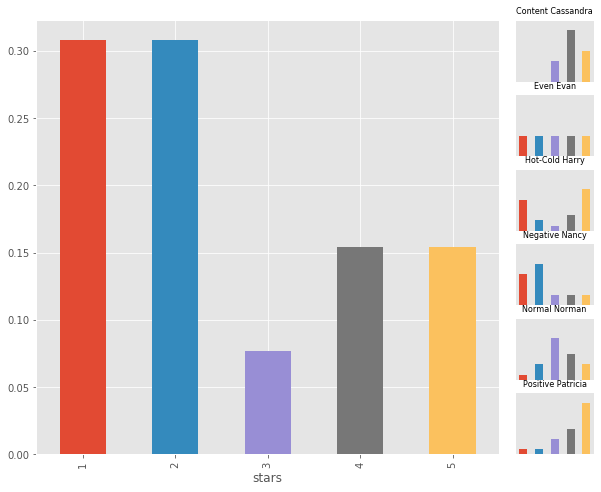

Content Cassandra    0.456025
Even Evan            0.907959
Hot-Cold Harry       0.804486
Negative Nancy       0.973964
Normal Norman        0.601113
Positive Patricia    0.549063
Name: Ary5jgSc2p6d6UJclC13PA, dtype: float64


In [76]:
plot_random_user('Negative Nancy', user_personas, reviewer_stars_table_10_scaled, distributions)

Terrific!

One last thing! Let's plot a few different plot types showing the distribution of personas.

We want to do the following things:
- Plot a bar chart (in descending order) of the distribution of personas
- Plot a pie chart (in the same chart as the bar chart) of the distribution of personas
- Move the legend for the pie chart
- Give each subplot a title
- Give the overall graphic a title
- Plot small versions of each persona on the right side of the chart

In [77]:
persona_sizes = user_personas_df.groupby('persona').size().sort_values(ascending=False)

In [95]:
personas_df

,1,2,3,4,5
Content Cassandra,0.00,0.00,0.20,0.50,0.30
Even Evan,0.20,0.20,0.20,0.20,0.20
Hot-Cold Harry,0.30,0.10,0.05,0.15,0.40
Negative Nancy,0.30,0.40,0.10,0.10,0.10
Normal Norman,0.05,0.15,0.40,0.25,0.15
Positive Patricia,0.05,0.05,0.15,0.25,0.50


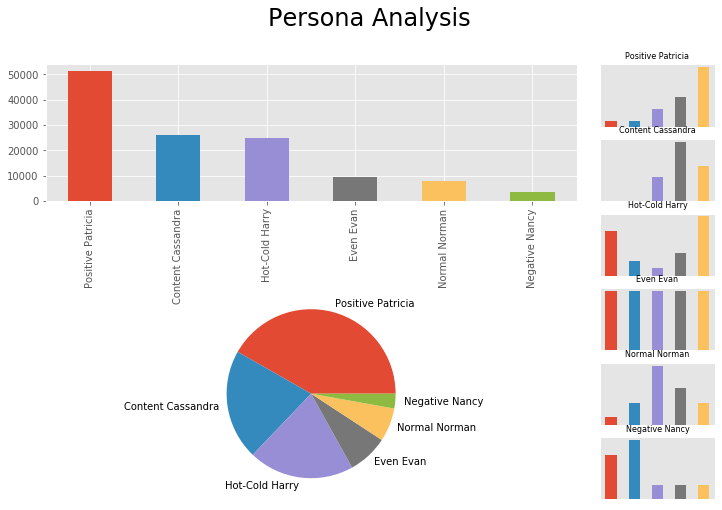

In [108]:
fig = plt.figure(figsize=(12,8))
plt.suptitle('Persona Analysis', fontsize=24)
ax1 = plt.subplot2grid((6,5), (0,0), rowspan=2, colspan=4)
ax2 = plt.subplot2grid((6,5), (3,0), rowspan=3, colspan=4)
ax3 = plt.subplot2grid((6,5), (0,4)) #colspan and rowspan defaults to 1
ax3.set_title('Positive Patricia', size=8)
ax4 = plt.subplot2grid((6,5), (1,4))
ax4.set_title('Content Cassandra', size=8)
ax5 = plt.subplot2grid((6,5), (2,4))
ax5.set_title('Hot-Cold Harry', size=8)
ax6 = plt.subplot2grid((6,5), (3,4))
ax6.set_title('Even Evan', size=8)
ax7 = plt.subplot2grid((6,5), (4,4))
ax7.set_title('Normal Norman', size=8)
ax8 = plt.subplot2grid((6,5), (5,4))
ax8.set_title('Negative Nancy', size=8)
persona_sizes.plot(kind='bar', ax=ax1)
persona_sizes.plot(kind='pie',ax=ax2, title='')
personas_df.loc['Positive Patricia'].plot(kind='bar', ax=ax3)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
personas_df.loc['Content Cassandra'].plot(kind='bar', ax=ax4)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
personas_df.loc['Hot-Cold Harry'].plot(kind='bar', ax=ax5)
ax5.xaxis.set_visible(False)
ax5.yaxis.set_visible(False)
personas_df.loc['Even Evan'].plot(kind='bar', ax=ax6)
ax6.xaxis.set_visible(False)
ax6.yaxis.set_visible(False)
personas_df.loc['Normal Norman'].plot(kind='bar', ax=ax7)
ax7.xaxis.set_visible(False)
ax7.yaxis.set_visible(False)
personas_df.loc['Negative Nancy'].plot(kind='bar', ax=ax8)
ax8.xaxis.set_visible(False)
ax8.yaxis.set_visible(False)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')
plt.tight_layout()


As you all know, I have a disdain for rewriting so much code. In this case, I will re-write the above code with some for-loops so that not all of our code is so repetitive.

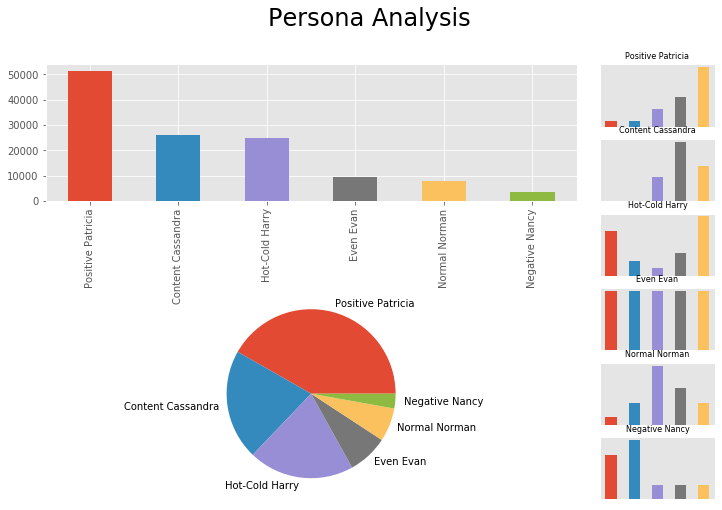

In [120]:
fig = plt.figure(figsize=(12,8))
plt.suptitle('Persona Analysis', fontsize=24)
axes = []
names = persona_sizes.index
for i, name in enumerate(names): #enumerate give you both the index value and the actual value as a tuple
    ax = plt.subplot2grid((6,5), (i,4))
    ax.set_title(name, size=8)
    personas_df.loc[name].plot(kind='bar', ax=ax)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    axes.append(ax)

ax_bar = plt.subplot2grid((6,5), (0,0), rowspan=2, colspan=4)
ax_pie = plt.subplot2grid((6,5), (3,0), rowspan=3, colspan=4)
persona_sizes.plot(kind='bar', ax=ax_bar)
persona_sizes.plot(kind='pie',ax=ax_pie)

ax_bar.set_xlabel('')
ax_bar.set_ylabel('')
ax_pie.set_xlabel('')
ax_pie.set_ylabel('')
plt.tight_layout()